## Lab 1a Merge Sort (continued)

### Timing mergesort
[time.time()](https://docs.python.org/3/library/time.html#time.time) gives us the number of seconds elapsed since a date called the [epoch](https://docs.python.org/3/library/time.html#epoch). We can use this to benchmark our code.
Run the following code below to see an example of `time.time()` in action.

In [1]:
import time

# Avoiding direct usage of numbers in our code helps us avoid bugs
LIST_SIZE = 20000000

# LIST APPEND
start1 = time.time() # Get the start time in seconds
lst1 = []
for i in range(LIST_SIZE):
    lst1.append(i)
end1 = time.time() # Get the end time in seconds

# PREALLOCATED LIST
lst2 = [0] * LIST_SIZE # Create a list of size LIST_SIZE first
start2 = time.time()
for i in range(LIST_SIZE):
    lst2[i] = i # We set the i-th index instead of appending
end2 = time.time()

# LIST COMPREHENSIONS
start3 = time.time()
lst3 = [i for i in range(LIST_SIZE)]
end3 = time.time()

print('Using List.append:', end1 - start1)
print('Instantiating our list first:', end2 - start2)
print('List comprehension black magic:', end3 - start3)

Using List.append: 3.8195900917053223
Instantiating our list first: 3.1907739639282227
List comprehension black magic: 1.4222440719604492


**Task 2**: Implement the function `time_mergesort` below. `time_mergesort` maps an integer, `list_length`, to the amount of time it takes to sort a random list that length.

Use [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) to generate a random sequence of the desired length.

In [2]:
import numpy as np

# Example usage of numpy.random.randint
my_array = np.random.randint(-100, 100, size=5)
print('my_array:', my_array)

# Relative imports like this allow us to use code from other local files
from algorithms.mergesort import merge_sort

def time_mergesort(list_length):
    """Takes in a non-negative integer, list_length, and returns the
    amount of time it takes to sort a random list of the given length.
    """
    rand_lst = np.random.randint(list_length, size=list_length)
    ### BEGIN SOLUTION
    start = time.time()
    merge_sort(rand_lst)
    end = time.time()
    return end - start
    ### END SOLUTION


my_array: [-29  21 -75  64  -1]


### Visualizing execution time

**Task 3**: We used `pandas.DataFrame.plot` on the first day to create a couple charts. Generate a list of lengths with `time_mergesort`, convert the list to a DataFrame, and then plot it to create a chart like the one below.
![image.png](images/line-plot.png)

Consider averaging the results of multiple runs on each list length.

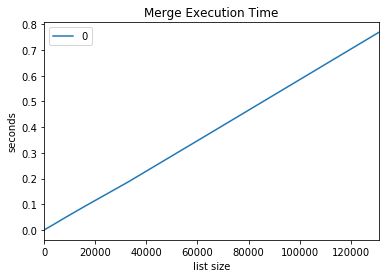

In [3]:
%matplotlib inline
### BEGIN SOLUTION
import pandas as pd
import numpy as np
    
list_lengths = [2 ** i for i in range(18)]
execution_times = [np.mean([time_mergesort(length),
                            time_mergesort(length),
                            time_mergesort(length),
                            time_mergesort(length),
                            time_mergesort(length)])
                   for length in list_lengths]

timing_df = pd.DataFrame(data=execution_times, index=list_lengths)

ax = timing_df.plot(kind = "line", title = "Merge Execution Time")
ax.set_xlabel('list size')
ax.set_ylabel('seconds')
### END SOLUTION

### Profiling Python
With `time.time()`, we can use the elapsed time between two timestamps to compute the execution time of a program. However, what if we want to know how long it takes for each line of code to run?

A <a href="https://en.wikipedia.org/wiki/Profiling_(computer_programming)#">profiler</a> can show that to us. In Jupyter Notebook, we can use [line_profiler](http://mortada.net/easily-profile-python-code-in-jupyter.html).


Run the following to install line_profiler with Anaconda:

In [4]:
!conda install line_profiler

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/lukezhu/anaconda:
#
line_profiler             2.0                      py36_0  


Run the following two cells see `line_profiler` in action.

In [5]:
import numpy as np

# Example function
def do_stuff(numbers):
    s = sum(numbers)
    l = [numbers[i]/43 for i in range(len(numbers))]
    m = ['hello'+str(numbers[i]) for i in range(len(numbers))]

numbers = [np.random.randint(1,100) for i in range(1000)]

In [6]:
%load_ext line_profiler
%lprun -f do_stuff do_stuff(numbers)

You will use line profiler later on in the assignment to measure the performance of your $k$-means implementation. Commit and push your changes to GitHub. Your lab will be checked for completeness with the assigment after 9/18 